<a href="https://colab.research.google.com/github/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/blob/JATAN_202218061/Income_modeling_dm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATASET02- Income

#1.Loading Required Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import Lasso,LinearRegression,ElasticNet,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import xgboost
# import optuna

#2. Load Dataset

In [243]:
data = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/Datasets/income.csv")

In [244]:
# Previewing data
data.head()

,yearend,locationabbr,sample_size,income,classid,questionid,stratificationcategory1,stratification1,stratificationcategoryid1,stratificationid1,data_value
0,2011,AL,1112.0,"Less than $15,000",OWS,Q036,Income,"Less than $15,000",INC,INCLESS15,38.5
1,2011,AL,1367.0,"$15,000 - $24,999",OWS,Q036,Income,"$15,000 - $24,999",INC,INC1525,34.8
2,2011,AL,757.0,"$25,000 - $34,999",OWS,Q036,Income,"$25,000 - $34,999",INC,INC2535,35.8
3,2011,AL,861.0,"$35,000 - $49,999",OWS,Q036,Income,"$35,000 - $49,999",INC,INC3550,32.3
4,2011,AL,785.0,"$50,000 - $74,999",OWS,Q036,Income,"$50,000 - $74,999",INC,INC5075,34.1


Looking at the above dataset our target variable is the column "Profit"

#3.Looking for Null values

In [245]:
print(data.isnull().sum())

yearend                      0
locationabbr                 0
sample_size                  0
income                       0
classid                      0
questionid                   0
stratificationcategory1      0
stratification1              0
stratificationcategoryid1    0
stratificationid1            0
data_value                   0
dtype: int64


#4.Preprocessing

#1. Removing Unnecessary columns

In [246]:
columns_to_drop = ['income', 'stratificationcategory1','stratification1','stratificationcategoryid1']
data = data.drop(columns=columns_to_drop)

###remove outliears

In [247]:
#creating function to remove outliers by using interquartile function
def remove_outliers(df):
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df.drop(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index, inplace=True)

In [248]:
remove_outliers(data)

In [249]:
data.shape

(12102, 7)

##Reason

1.Income, stratificationcategory1, stratificationcategoryid1--> all the data is for income so we removed.

2.stratification1 ---> It is a income range and we already have stratificationid1 as abbrevation for this.

#2.Converting Categorical Variables into their corresponding form

In [250]:
print(data.dtypes)

yearend                int64
locationabbr          object
sample_size          float64
classid               object
questionid            object
stratificationid1     object
data_value           float64
dtype: object


In [251]:
le = LabelEncoder()
data['locationabbr_encoded'] = le.fit_transform(data["locationabbr"])

In [252]:
columns_to_drop = ['locationabbr']
data = data.drop(columns=columns_to_drop)

In [253]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=['classid'], prefix=['classid'])
data = pd.get_dummies(data, columns=['questionid'], prefix=['questionid'])
data = pd.get_dummies(data, columns=['stratificationid1'], prefix=['stratificationid1'])
data = pd.DataFrame(data)

In [254]:
data

,yearend,sample_size,data_value,locationabbr_encoded,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,...,questionid_Q045,questionid_Q046,questionid_Q047,stratificationid1_INC1525,stratificationid1_INC2535,stratificationid1_INC3550,stratificationid1_INC5075,stratificationid1_INC75PLUS,stratificationid1_INCLESS15,stratificationid1_INCNR
0,2011,1112.0,38.5,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2011,1367.0,34.8,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2011,757.0,35.8,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2011,861.0,32.3,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,2011,785.0,34.1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13344,2016,154.0,28.9,48,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
13345,2016,158.0,20.9,48,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
13346,2016,159.0,29.8,48,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13347,2016,212.0,13.3,48,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [255]:
# #encoding Embarked column
# le = LabelEncoder()
# data['locationabbr_encoded'] = le.fit_transform(data["locationabbr"])
# data['classid_encoded'] = le.fit_transform(data["classid"])
# data['questionid_encoded'] = le.fit_transform(data["questionid"])
# data['stratificationid1_encoded'] = le.fit_transform(data["stratificationid1"])

In [256]:
# columns_to_drop = ['yearend','locationabbr','classid','questionid','stratificationid1']
# data = data.drop(columns=columns_to_drop)

In [257]:
data.head()

,yearend,sample_size,data_value,locationabbr_encoded,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,...,questionid_Q045,questionid_Q046,questionid_Q047,stratificationid1_INC1525,stratificationid1_INC2535,stratificationid1_INC3550,stratificationid1_INC5075,stratificationid1_INC75PLUS,stratificationid1_INCLESS15,stratificationid1_INCNR
0,2011,1112.0,38.5,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2011,1367.0,34.8,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2011,757.0,35.8,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2011,861.0,32.3,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,2011,785.0,34.1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#3.Scaling Features

In the same way as encoding features we can also scale features manually. Scikit learn as inbuilt scalers that do the same task. Here we shall use standard scaler for our task

In [258]:
sc = StandardScaler()
data["sample_size_scaled"] = sc.fit_transform(data["sample_size"].values.reshape(-1,1))
data["yearend_encoded"] = sc.fit_transform(data["yearend"].values.reshape(-1,1))
columns_to_drop = ['sample_size','yearend']
data = data.drop(columns=columns_to_drop)
data.head(2)

,data_value,locationabbr_encoded,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,...,questionid_Q047,stratificationid1_INC1525,stratificationid1_INC2535,stratificationid1_INC3550,stratificationid1_INC5075,stratificationid1_INC75PLUS,stratificationid1_INCLESS15,stratificationid1_INCNR,sample_size_scaled,yearend_encoded
0,38.5,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0.120958,-1.355526
1,34.8,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0.619105,-1.355526


There's an important consideration when it comes to interpretation. If we scale the target variable during preprocessing (for example, using MinMaxScaler to scale it to a specific range), we'll need to remember that any predictions made by the model will be in the scaled range. If we need to interpret the predictions in the original units (e.g., dollars for profit), we'll have to reverse the scaling transformation to get the predictions in the original scale."

In [259]:
data_value_df = data[["data_value"]]  # Extracting the "Profit" column as a separate DataFrame
scaler = StandardScaler()
data_value_scaled = scaler.fit_transform(data_value_df.values.reshape(-1,1))
# Converting the scaled profit back to a pandas Series (if needed)
# scaled_profit_series = pd.Series(scaled_profit[:, 0], name="Scaled_Profit")

In [260]:

# # Get the mean and standard deviation from the scaler
# mean_profit = scaler.mean_[0]
# std_dev_profit = scaler.scale_[0]

# scaled_prediction =  2.01120333

# # Reverse the scaling to get the prediction in the original units
# original_prediction = (scaled_prediction * std_dev_profit) + mean_profit

# print("Original prediction in dollars:", original_prediction)


In [261]:
# Droping target column from dataset
data.drop(["data_value"],1,inplace = True)

In [262]:
data['scaled_target_value'] = data_value_scaled

In [263]:
data.head()

,locationabbr_encoded,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,...,stratificationid1_INC1525,stratificationid1_INC2535,stratificationid1_INC3550,stratificationid1_INC5075,stratificationid1_INC75PLUS,stratificationid1_INCLESS15,stratificationid1_INCNR,sample_size_scaled,yearend_encoded,scaled_target_value
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0.120958,-1.355526,0.880598
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0.619105,-1.355526,0.464330
2,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,-0.572541,-1.355526,0.576835
3,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,-0.369375,-1.355526,0.183068
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,-0.517842,-1.355526,0.385577


#5.Basic EDA

#1.Gathering some info about data

In [264]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
locationabbr_encoded,12102.0,2.632879e+01,15.551575,0.000000,13.000000,26.000000,39.000000,53.000000
classid_FV,12102.0,1.679888e-01,0.373872,0.000000,0.000000,0.000000,0.000000,1.000000
classid_OWS,12102.0,3.432490e-01,0.474813,0.000000,0.000000,0.000000,1.000000,1.000000
classid_PA,12102.0,4.887622e-01,0.499894,0.000000,0.000000,0.000000,1.000000,1.000000
questionid_Q018,12102.0,8.296149e-02,0.275835,0.000000,0.000000,0.000000,0.000000,1.000000
questionid_Q019,12102.0,8.502727e-02,0.278934,0.000000,0.000000,0.000000,0.000000,1.000000
questionid_Q036,12102.0,1.716245e-01,0.377069,0.000000,0.000000,0.000000,0.000000,1.000000
questionid_Q037,12102.0,1.716245e-01,0.377069,0.000000,0.000000,0.000000,0.000000,1.000000
questionid_Q043,12102.0,6.420426e-02,0.245127,0.000000,0.000000,0.000000,0.000000,1.000000
questionid_Q044,12102.0,8.494464e-02,0.278811,0.000000,0.000000,0.000000,0.000000,1.000000


In [265]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12102 entries, 0 to 13348
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   locationabbr_encoded         12102 non-null  int64  
 1   classid_FV                   12102 non-null  uint8  
 2   classid_OWS                  12102 non-null  uint8  
 3   classid_PA                   12102 non-null  uint8  
 4   questionid_Q018              12102 non-null  uint8  
 5   questionid_Q019              12102 non-null  uint8  
 6   questionid_Q036              12102 non-null  uint8  
 7   questionid_Q037              12102 non-null  uint8  
 8   questionid_Q043              12102 non-null  uint8  
 9   questionid_Q044              12102 non-null  uint8  
 10  questionid_Q045              12102 non-null  uint8  
 11  questionid_Q046              12102 non-null  uint8  
 12  questionid_Q047              12102 non-null  uint8  
 13  stratificationid

#2.Correlation plot

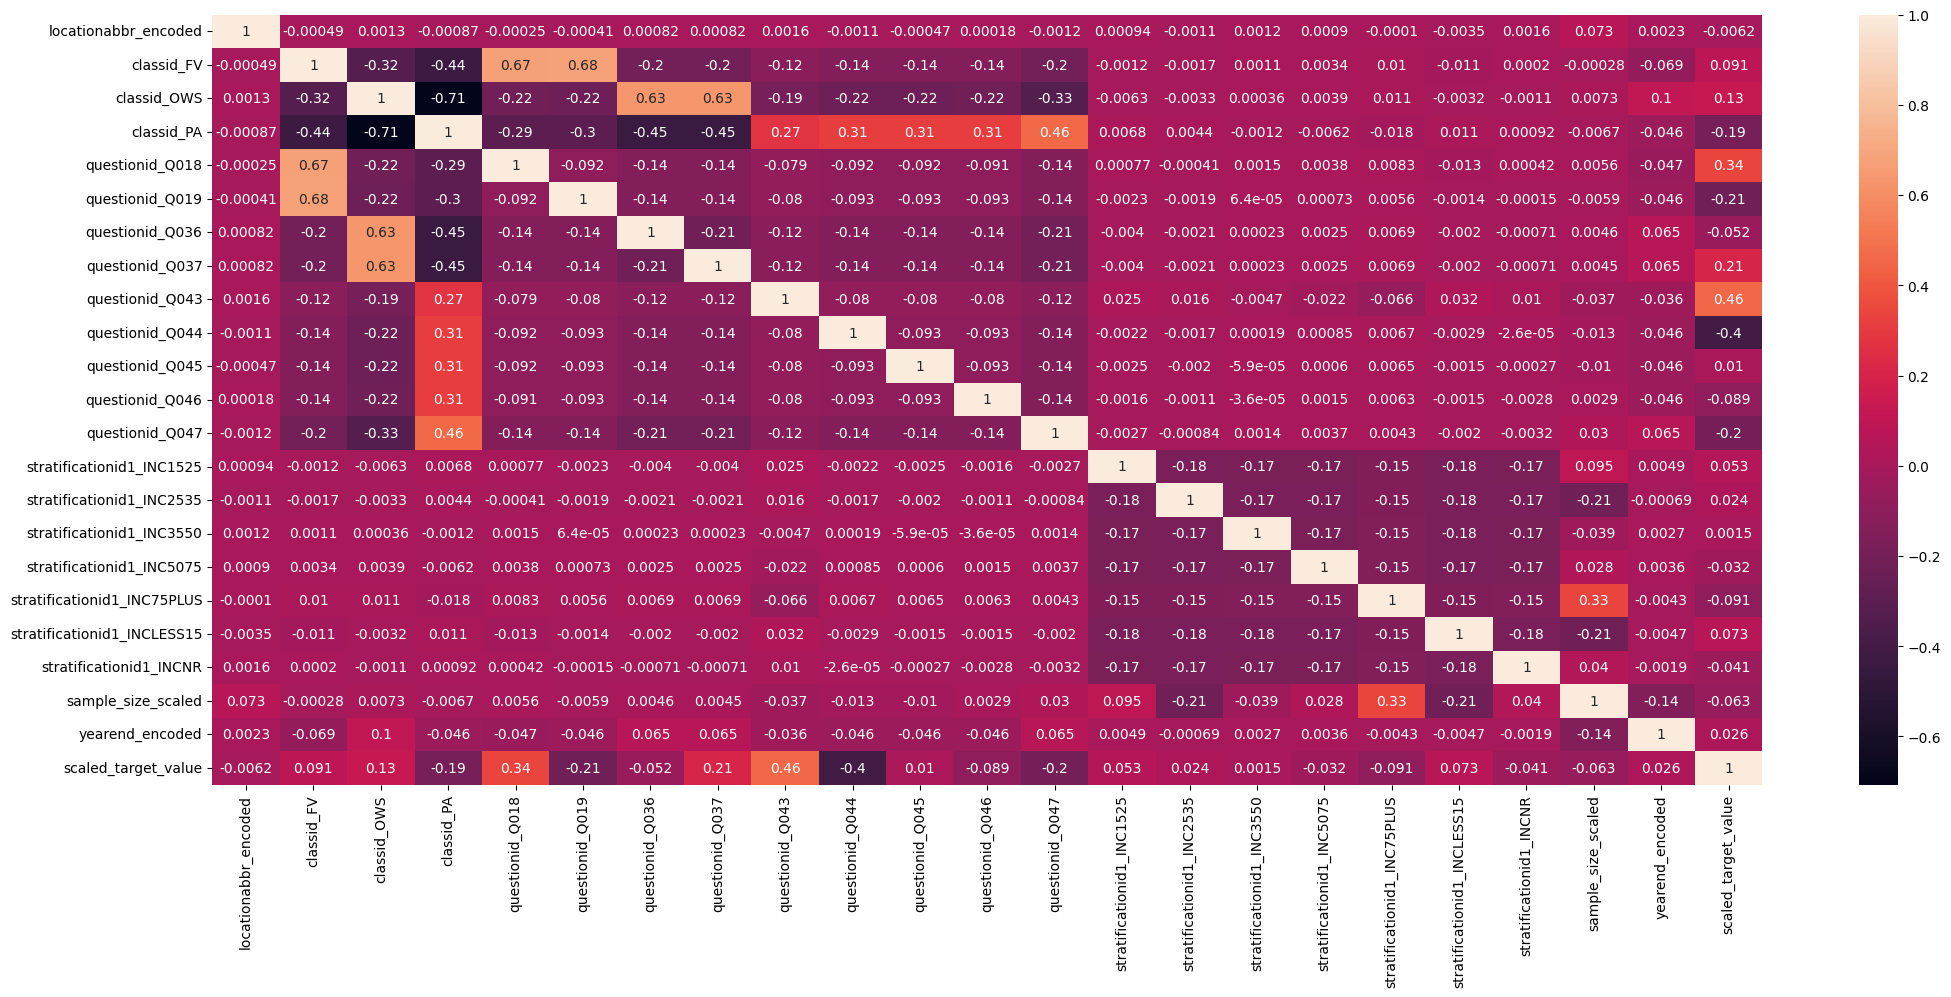

In [266]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True);

#6.Splitting the dataset

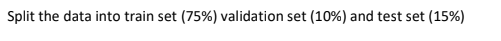

In [267]:
data.head()

,locationabbr_encoded,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,...,stratificationid1_INC1525,stratificationid1_INC2535,stratificationid1_INC3550,stratificationid1_INC5075,stratificationid1_INC75PLUS,stratificationid1_INCLESS15,stratificationid1_INCNR,sample_size_scaled,yearend_encoded,scaled_target_value
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0.120958,-1.355526,0.880598
1,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0.619105,-1.355526,0.464330
2,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,-0.572541,-1.355526,0.576835
3,1,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,-0.369375,-1.355526,0.183068
4,1,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,-0.517842,-1.355526,0.385577


In [270]:
x = data.iloc[:,:20]
y = data['scaled_target_value']

In [271]:
x.head()

,locationabbr_encoded,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,questionid_Q045,questionid_Q046,questionid_Q047,stratificationid1_INC1525,stratificationid1_INC2535,stratificationid1_INC3550,stratificationid1_INC5075,stratificationid1_INC75PLUS,stratificationid1_INCLESS15,stratificationid1_INCNR
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [272]:
x_train,x_part,y_train,y_part = train_test_split(x,y,test_size = 0.25,random_state = 42)
x_test,x_valid,y_test,y_valid = train_test_split(x_part,y_part,test_size = 0.4,random_state = 42)

In [273]:
print(x_train.shape,x_test.shape,x_valid.shape)
print(y_train.shape,y_test.shape,y_valid.shape)

(9076, 20) (1815, 20) (1211, 20)
(9076,) (1815,) (1211,)


#7.Model Selection

In [274]:
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test,x_valid = x_valid,y_valid = y_valid):

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_val_pred = model.predict(x_valid)

    Training_Score = np.round(model.score(x_train,y_train),3)
    Testing_Score = np.round(model.score(x_test,y_test),3)
    Validation_score = np.round(model.score(x_valid,y_valid))

    mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    mse_validation = np.round(mean_squared_error(y_valid,y_val_pred),3)

    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    mae_valid = np.round(mean_absolute_error(y_valid,y_val_pred),3)

    r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    r2_valid = np.round(r2_score(y_valid,y_val_pred),3)

    print("Model Performance for:",model_name)
    print("")

    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("Validation Score",Validation_score)
    print("")



    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("Validation Data Mean Squared Error:",mse_validation)

    print("")

    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("Validation Data Mean Absolute Error:",mae_valid)
    print("")

    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("Validation Data r2_score:",r2_valid)
    print("")

    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions')
    plt.scatter(y_valid,(y_valid-y_val_pred),color = 'blue',label = "Validation Predictions")
    plt.legend()
    plt.show()

    return Training_Score,Testing_Score,Validation_score,mse_training,mse_testing,mse_validation,mae_training,mae_testing,mae_valid,r2_training,r2_testing,r2_valid

#1. Linear Regression

In [275]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

Model Performance for: LinearRegression()

Training Score: 0.572
Testing Score: 0.585
Validation Score 1.0

Training Data Mean Squared Error: 0.428
Testing Data Mean Squared Error: 0.418
Validation Data Mean Squared Error: 0.401

Training Data Mean Absolute Error: 0.521
Testing Data Mean Absolute Error: 0.511
Validation Data Mean Absolute Error: 0.508

Training Data r2_score: 0.572
Testing Data r2_score: 0.585
Validation Data r2_score: 0.597

Residual Analysis:


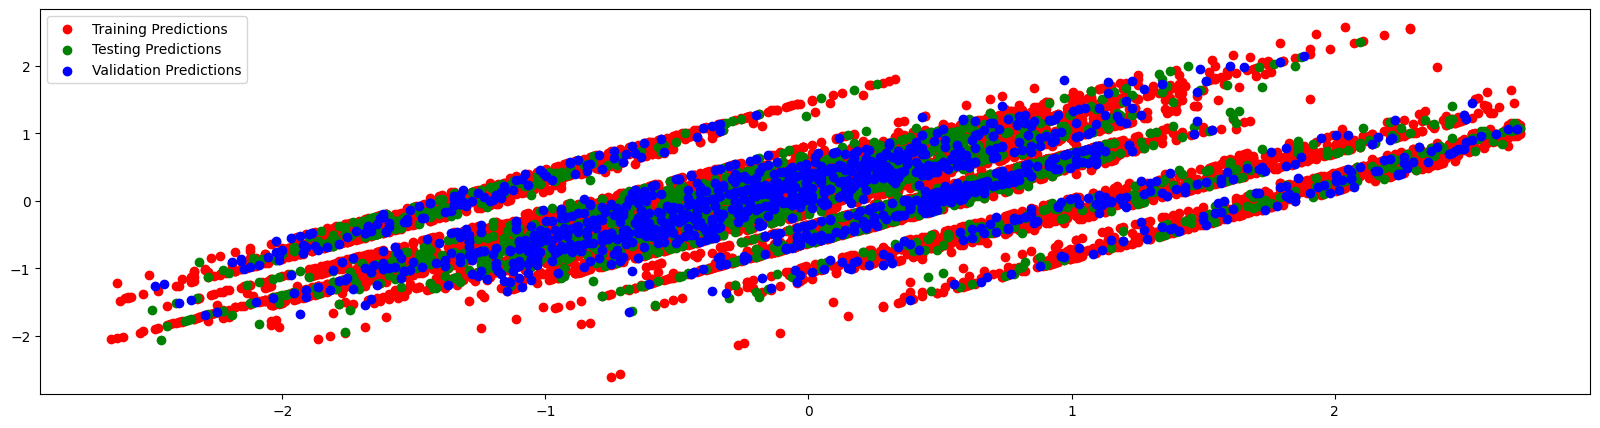

In [276]:
lr_perf = model_performance(model1,model_name = model1)

#2. Ridge

In [277]:
model2 = Ridge(alpha = 0.01)
model2.fit(x_train,y_train)

Ridge(alpha=0.01)

Model Performance for: Ridge(alpha=0.01)

Training Score: 0.572
Testing Score: 0.585
Validation Score 1.0

Training Data Mean Squared Error: 0.428
Testing Data Mean Squared Error: 0.418
Validation Data Mean Squared Error: 0.401

Training Data Mean Absolute Error: 0.521
Testing Data Mean Absolute Error: 0.511
Validation Data Mean Absolute Error: 0.508

Training Data r2_score: 0.572
Testing Data r2_score: 0.585
Validation Data r2_score: 0.597

Residual Analysis:


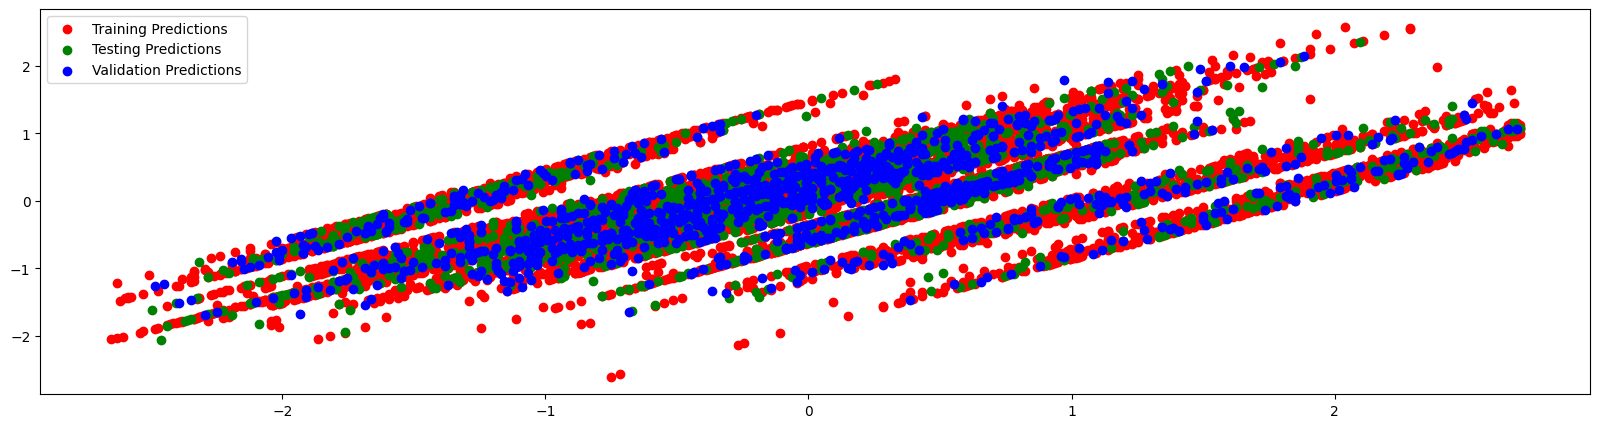

In [278]:
ridge_perf = model_performance(model2,model2)

#3. KNeighborsRegressor

In [279]:
model3 = KNeighborsRegressor(n_neighbors = 6)
model3.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

Model Performance for: KNeighborsRegressor(n_neighbors=6)

Training Score: 0.857
Testing Score: 0.767
Validation Score 1.0

Training Data Mean Squared Error: 0.143
Testing Data Mean Squared Error: 0.235
Validation Data Mean Squared Error: 0.229

Training Data Mean Absolute Error: 0.288
Testing Data Mean Absolute Error: 0.364
Validation Data Mean Absolute Error: 0.358

Training Data r2_score: 0.857
Testing Data r2_score: 0.767
Validation Data r2_score: 0.77

Residual Analysis:


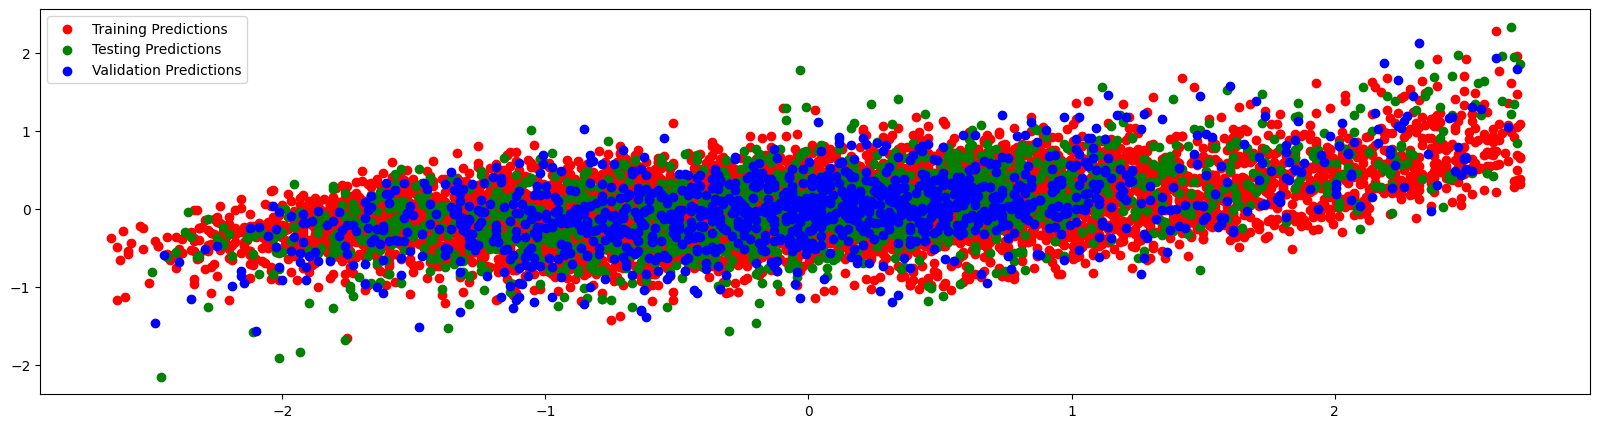

In [280]:
knn_perf = model_performance(model3,model3)

Linear Regression is giving best result

In [281]:
prediction = model1.predict(x_test)

In [282]:
prediction

array([-1.30025525, -1.21157785,  0.62963339, ..., -0.27111028,
        1.85789351,  1.51894325])

In [231]:
# Get the mean and standard deviation from the scaler
mean_profit = scaler.mean_[0]
std_dev_profit = scaler.scale_[0]

scaled_prediction =  prediction

# Reverse the scaling to get the prediction in the original units
original_prediction = (scaled_prediction * std_dev_profit) + mean_profit

print("Original data value", original_prediction)

Original prediction in dollars: [19.05111779 19.05111779 34.74705881 ... 29.73750816 45.98572583
 45.98572583]
